<a href="https://colab.research.google.com/github/wesmith4/mat210-data-viz/blob/master/feedingAmerica/feedingAmerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import and Clean data
The data from [Feeding America](https://www.feedingamerica.org/) is living in CSV files in the `/data` directory. The code block below imports that data, cleans it for our use, and combines it into the `allData.csv` file.

In [119]:
# Import data from CSV files if running locally, or from GitHub if running on Google Colab

importDirect = True
if 'google.colab' in str(get_ipython()):
    importDirect = False
    print('Running on Google Colab --- importing files straight from GitHub')

if importDirect:
    print('Running on direct --- importing files from file directory')
    data_frames = {}
    for year in range(2010, 2018):
        data_frames[year] = pd.read_csv('data/{}Data.csv'.format(year))
        data_frames[year]['Year'] = year

    data_frames[2018] = pd.read_csv('data/2018Data.csv',header=1)
    data_frames[2018]['Year'] = 2018


    # Create list of preferred column names
    col_names = ['FIPS', 'State', 'Food Insecurity Rate', '# Food Insecure Persons', 'Low Threshold in state', 'Low Threshold Type', 'High Threshold in state', 'High Threshold Type', '% FI <= Low Threshold', '% FI Btwn Thresholds', '$ FI > High Threshold', 'Child food insecurity rate', '# Food Insecure Children', '% food insecure children in HH w/ HH incomes below 185 FPL', '% food insecure children in HH w/ HH incomes above 185 FPL', 'Cost Per Meal', 'Weighted Annual Food Budget Shortfall', 'Year', 'County']

    # Clean data
    for key in data_frames:
        df = data_frames[key]
        df[['County', 'Long State']] = df['County, State'].str.split(',',expand=True)
        df = df.drop(['County, State', 'Long State'],axis=1)
        df.columns = col_names # rename columns
        data_frames[key] = df

    # Concatenate all datarames into one
    frames = [data_frames[key] for key in data_frames]

    df = pd.concat(frames)
    df.to_csv('allData.csv') # export into CSV file
    projections2020 = pd.read_csv('data/2020Projections.csv')
else:
    url = 'https://raw.githubusercontent.com/wesmith4/mat210-data-viz/master/feedingAmerica/allData.csv'
    df = pd.read_csv(url, index_col = 0)
    projections2020 = pd.read_csv('https://raw.githubusercontent.com/wesmith4/mat210-data-viz/master/feedingAmerica/data/2020Projections.csv')

Running on Google Colab --- importing files straight from GitHub


In [120]:
forReplacement = ['Food Insecurity Rate', 'Child food insecurity rate', 'Low Threshold in state', 'High Threshold in state', '% food insecure children in HH w/ HH incomes below 185 FPL', '% food insecure children in HH w/ HH incomes above 185 FPL']
for field in forReplacement:
    df[field] = df[field].str.replace('%', '').replace('-*', 'NaN')

df = df.astype({'Food Insecurity Rate': float, 'Child food insecurity rate': float})

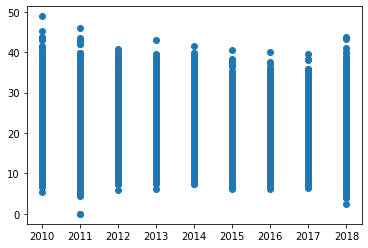

In [121]:
fig, ax = plt.subplots()
ax.scatter(df.Year,df['Child food insecurity rate'])
plt.show()

In [122]:
national_aggregates = df.groupby(['Year'])['Child food insecurity rate'].mean().to_frame()
NC_aggregates = df[df['State'] == 'NC'].groupby(['Year'])['Child food insecurity rate'].mean().to_frame()
NewHanCty_aggregates = df[df['County'] == "New Hanover County"].groupby('Year')['Child food insecurity rate'].mean().to_frame()

In [125]:
projections2020['Year'] = 2020
projections2020 = projections2020.rename(columns={'[Revised Projections – Oct 2020] \n2020 Child Food Insecurity  %':'Child food insecurity rate'})
NCProjections2020 = projections2020[projections2020['State'] == 'NC'].groupby(['Year'])['Child food insecurity rate'].mean().to_frame()
NewHanCtyProjections2020 = projections2020[projections2020['County, State'].str.contains('New Hanover')].groupby('Year')['Child food insecurity rate'].mean().to_frame()
NationalProjections2020 = projections2020.groupby('Year')['Child food insecurity rate'].mean().to_frame()

NC_aggregates = NC_aggregates.append(NCProjections2020*100)
NewHanCty_aggregates = NewHanCty_aggregates.append(NewHanCtyProjections2020*100)
national_aggregates = national_aggregates.append(NationalProjections2020*100)

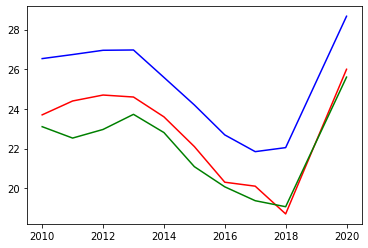

In [129]:
plt.plot(NewHanCty_aggregates, 'r')
plt.plot(NC_aggregates, 'b')
plt.plot(national_aggregates, 'g')